0.0 1.0 [  1.11568692e-06   8.96786476e-06   5.91380781e-05   3.19946092e-04
   1.42009650e-03   5.17118833e-03   1.54487839e-02   3.78642785e-02
   7.61371334e-02   1.25601494e-01   1.69990453e-01   1.88749456e-01
   1.71940557e-01   1.28499784e-01   7.87876076e-02]
0.1 1.0 [ 0.010001    0.02000807  0.04005322  0.02028795  0.01127809  0.00465407
  0.01390391  0.03407785  0.06852342  0.11304134  0.15299141  0.16987451
  0.1547465   0.11564981  0.07090885]
0.2 1.0 [ 0.02000089  0.04000717  0.08004731  0.04025596  0.02113608  0.00413695
  0.01235903  0.03029142  0.06090971  0.10048119  0.13599236  0.15099956
  0.13755245  0.10279983  0.06303009]
0.3 1.0 [ 0.03000078  0.06000628  0.1200414   0.06022396  0.03099407  0.00361983
  0.01081415  0.02650499  0.05329599  0.08792105  0.11899332  0.13212462
  0.12035839  0.08994985  0.05515133]
0.4 1.0 [ 0.04000067  0.08000538  0.16003548  0.08019197  0.04085206  0.00310271
  0.00926927  0.02271857  0.04568228  0.0753609   0.10199427  0.11324967
  

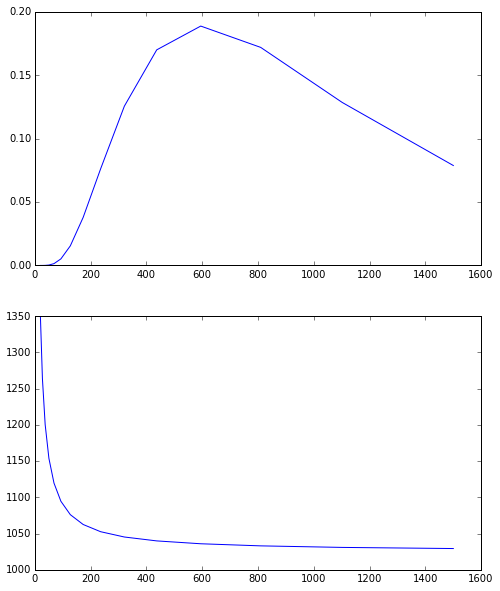

In [131]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Dp = 4.
rhow = 1025.
rhos = 2650.
nf = 2.
nd = 15
D = np.logspace(np.log10(20.),np.log10(1500.),nd)
# density from fractal dimension
rhof = rhow + (rhos-rhow)*(D/Dp)**(nf-3.)
# log-normal distribution
mu = np.log10(600.)
sigma = np.log10(2.)
fr = 1./(np.sqrt(2.*np.pi*sigma**2))*np.exp(-(np.log10(D)-mu)**2/(2.*sigma**2))
fr = fr/(np.sum(fr))
# de-floc distribution
frd = np.zeros_like(fr)
frd[0:5]=(.1, .2, .4, .2, .1)
for t in np.arange(0.,1.1,.1):
    frt = fr+t*(frd-fr)
    print t, np.sum(frt), frt

for i in np.arange(len(D)):
    print D[i],rhof[i],fr[i]

fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(D,fr)
plt.subplot(2,1,2)
plt.plot(D,rhof)
plt.show()

In [129]:
nDbins = 21
nrbins = 31
Dbinlims = np.logspace(np.log10(2.),np.log10(2000.),nDbins+1)
rbinlims = np.linspace(1030.,1350.,nrbins+1)
# print rbinlims
# print Dbinlims
frac = np.zeros( (nDbins,nrbins) )
for k in np.arange(len(D)):
    for i in np.arange(len(Dbinlims)-1):
        for j in np.arange(len(rbinlims)-1):
            if (D[k]>Dbinlims[i] and D[k]<=Dbinlims[i+1]) and (rhof[k]>rbinlims[j] and rhof[k]<=rbinlims[j+1]):
                print k,i,j,D[k],rhof[k],frt[k],'rbinlims:',rbinlims[j],rbinlims[j+1]
                frac[i,j]=frac[i,j]+fr[k]
            
print 'Sum of frac: ',np.sum(frac)
frac = frac/np.sum(frac)

0 6 30 20.0 1350.0 1.11568691774e-06 rbinlims: 1339.67741935 1350.0
1 7 22 27.2246899865 1263.75386655 8.96786476068e-06 rbinlims: 1257.09677419 1267.41935484
2 8 16 37.0591872429 1200.39510398 5.91380780959e-05 rbinlims: 1195.16129032 1205.48387097
3 9 11 50.446244192 1153.85002846 0.000319946091548 rbinlims: 1143.5483871 1153.87096774
4 10 8 68.6691679554 1119.65674616 0.00142009650483 rbinlims: 1112.58064516 1122.90322581
5 11 6 93.4748404607 1094.53742812 0.00517118832706 rbinlims: 1091.93548387 1102.25806452
6 12 4 127.241177654 1076.0840918 0.0154487838521 rbinlims: 1071.29032258 1081.61290323
7 13 3 173.205080757 1062.5277675 0.0378642785115 rbinlims: 1060.96774194 1071.29032258
8 14 2 235.772731384 1052.56892182 0.0761371334278 rbinlims: 1050.64516129 1060.96774194
9 15 1 320.94197596 1045.2528821 0.125601493558 rbinlims: 1040.32258065 1050.64516129
10 16 0 436.877289958 1039.87831972 0.169990453496 rbinlims: 1030.0 1040.32258065
11 17 0 594.692439061 1035.93001957 0.1887494556

[    2.38949549     2.93069773     3.6826958      4.72759372     6.17947468
     8.19685673    11.            14.89495494    20.30697729    27.82695795
    38.2759372     52.79474679    72.9685673    101.           139.94954944
   194.06977289   269.26957953   373.75937203   518.94746792   720.685673
  1001.        ]
[ 1032.74193548  1035.48387097  1038.22580645  1040.96774194  1043.70967742
  1046.4516129   1049.19354839  1051.93548387  1054.67741935  1057.41935484
  1060.16129032  1062.90322581  1065.64516129  1068.38709677  1071.12903226
  1073.87096774  1076.61290323  1079.35483871  1082.09677419  1084.83870968
  1087.58064516  1090.32258065  1093.06451613  1095.80645161  1098.5483871
  1101.29032258  1104.03225806  1106.77419355  1109.51612903  1112.25806452
  1115.        ]
(21L, 31L) (21L, 31L) (21L, 31L)


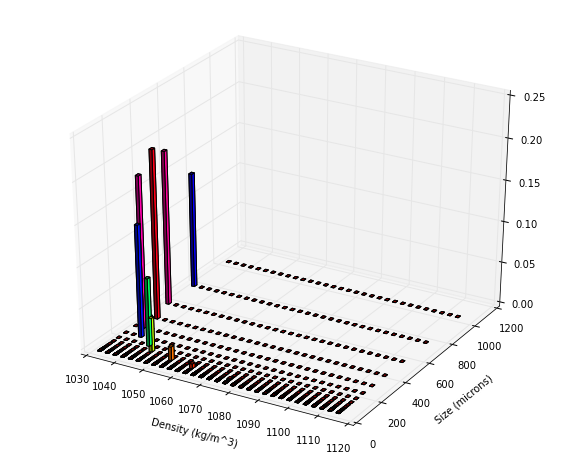

In [120]:
Dbins = Dbinlims[0]+np.cumsum(0.5*np.diff(Dbinlims))
rbins = rbinlims[0]+np.cumsum(0.5*np.diff(rbinlims))
print Dbins
print rbins
x,y = np.meshgrid( rbins, Dbins )
print x.shape, y.shape, frac.shape
x = x.flatten()
y = y.flatten()
z = frac.flatten()

import matplotlib.cm as cm
import matplotlib.colors as colors
norm = colors.Normalize(frac.min(), frac.max())
colors = cm.hsv(norm(z))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x, y, np.zeros(len(z)), 1, 20, z, color = colors)
plt.ylabel('Size (microns)')
plt.xlabel('Density (kg/m^3)')
#plt.zlabel('Fraction')
plt.show()